# Лекция. Основы Cтатистики. Часть 3

## Содержание
[3.1 Понятие корреляции](#3.1)  
[3.2 Условия применения коэффициента корреляции](#3.2)  
[3.3 Регрессия с одной независимой переменной](#3.3)  
[3.4 Гипотеза о значимости взаимосвязи и коэффициент детерминации](#3.4)  
[3.5 Условия применения линейной регрессии с одним предиктором](#3.5)  
[3.6](#3.6)  
[3.7](#3.7)  
[3.8](#3.8)  
[3.9](#3.9)  
[3.10](#3.10)  
[3.11](#3.11)  
[3.12](#3.12)  

## 3.1 Понятие корреляции<a id='3.1'></a>

### Основные определения и тезисы:
**Ковариация(cov)** - количественный показатель силы и направления взаимосвязи переменных. Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.  
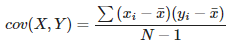  

**Корреляция** - мера степени взаимосвязи между двумя переменными. Позволяет определить, **насколько сильно** две переменные связаны друг с другом, а также направление этой взаимосвязи.  

Поскольку масштаб ковариации зависит от дисперсий величин. Значения ковариации можно нормализировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется **коэффициентом корреляции Пирсона**, который всегда находится в интервале от −1 до 1:  
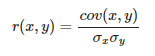  

**Коэффициент корреляции(r)** принимает значения от -1 до 1. Значение -1 означает, что между двумя переменными существует полная обратная корреляция, т.е. когда одна переменная увеличивается, другая уменьшается. Значение 1 означает, что между переменными существует полная прямая корреляция, т.е. когда одна переменная увеличивается, другая также увеличивается. Значение 0 означает, что между переменными нет корреляции. Чем **ближе** значение коэффициента корреляции к 1 или к -1, тем **сильнее** взаимосвязь двух переменных.  

**Коэффициент детерминации(R²)** = квадрату коэффициента корреляции. Показывает, в какой степени дисперсия одной переменной обусловлена влиянием ругой переменной. Принимает значения от 0 до 1. Значение 0 означает, что модель не объясняет никакой вариации в данных, а значение 1 означает, что модель объясняет всю вариацию в данных. Высокое значение коэффициента детерминации указывает на то, что модель регрессии хорошо соответствует данным и может быть использована для прогнозирования.   

**Диаграмма рассеивания** - Данные представляются в виде точек на графике, где каждая точка представляет собой наблюдение для двух переменных. Одна переменная обычно отображается по оси X, а другая переменная - по оси Y.  

*Поскольку сравниваются 2 переменные, то df = N - 2*

### Подробнее о формуле коэффициента корреляции
Формула коэффициента корреляции:  
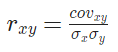  
Преобразование формулы:  
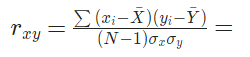  
Подробнее расписываются стандартные отклонения:  
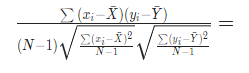  
Выносится 1 / (N - 1) из под корней:  
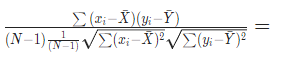  
(N - 1) сокращается:  
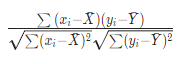  
Получется финальная формула для коэффициента корреляции, которую часто можно увидеть в учебниках:  
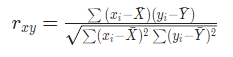  

### Примеры:  
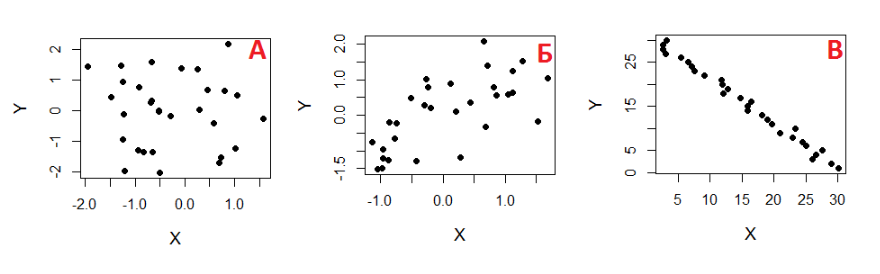
**А** - 0.02;  
**Б** - 0.55;  
**В** - 0.9.

In [23]:
"""Пример расчета ковариации и корреляции"""
import numpy as np
import random as r

# расчет выборочной ковариации
def cov(x, y):
    # проверка что размерности массивов x и y совпадают
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum() / (x.size - 2)

# рассчет выборочной корреляции
def cor(x, y):
    return cov(x, y) / (np.std(x, ddof=2) * np.std(y, ddof=2))

# генерация случайных значений
# р - размер "шага" при генерации случайных значений(чем больше, тем более рандомное получится значение)
def randomize(arr, p):
    # размах
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    # для каждого элемента генерирует случайное число в диапазоне от -1 до 1
    # полученное число умножается на alpha и на p. 
    # далее число прибавляется или вычитается из оригинального элемента (v) в зависимости от знака случайного числа.
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign * alpha * r.random() * p
    return res

In [24]:
# подготовка пар массивов случайных значений
x = np.array(range(50))
y1 = randomize(x, 0.1)
y2 = randomize(x, 0.5)
y3 = randomize(x, 1)

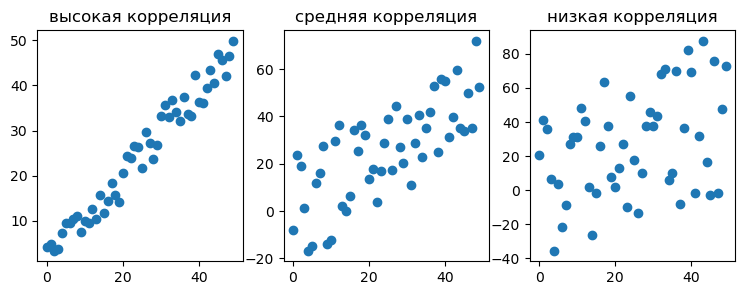

In [25]:
# визуализация
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
ax1.scatter(x, y1)
ax2.scatter(x, y2)
ax3.scatter(x, y3)
ax1.set_title('высокая корреляция')
ax2.set_title('средняя корреляция')
ax3.set_title('низкая корреляция')
plt.show()

In [26]:
# рассчет ковариации и корреляции
# значение высчитываются между исходным массивом x (от 0 до 49)
# и его случайно измененным "аналогом"
print(f'''
cov1: {cov(x, y1):.2f}
cov2: {cov(x, y2):.2f}
cov3: {cov(x, y3):.2f}

cor1: {cor(x, y1):.2f}
cor2: {cor(x, y2):.2f}
cor3: {cor(x, y3):.2f}
''')


cov1: 199.59
cov2: 222.84
cov3: 164.17

cor1: 0.98
cor2: 0.73
cor3: 0.36



(Pearson's correlation coefficient, 2-tailed p-value) = PearsonRResult(statistic=0.6397032078979183, pvalue=0.0001410953868148287)


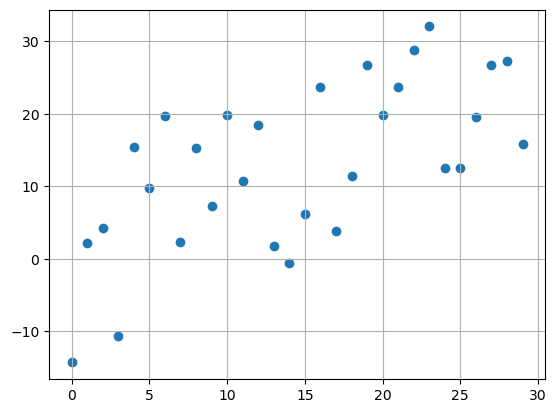

data: x and y
t = 4.40397, df = 28, p-value = 0.00014
z value: 0.7576712096703672
sigma value (i.e standard error): 0.19245008972987526
Отклоняем H0 в пользу альтернативной: коэффициент корелляции в ГС p = 0.00014109538681482826 < 0.05
95 percent confidence interval:[0.36312074 0.81267823]
PearsonCorellation: 0.6397032078979183


In [35]:
"""Пример выбора гипотезы с помощью scipy"""
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random as r

def cortest(x,y):
    assert len(x)==len(y)
    
    #t-критерий
    cor_pearson = stats.pearsonr(x, y)[0]
    df = len(x)-2
    
    t = cor_pearson * ((len(x) - 2) / (1 - cor_pearson**2))**0.5
    p_val = stats.t.sf(np.abs(t), df)*2
    print("data: x and y")
    print(f"t = {round(t,5)}, df = {df}, p-value = {p_val:.5f}")

    # трансформация Фишера
    z = np.arctanh(cor_pearson)
    print("z value: {}".format(z))

    # стандарная ошибка среднего
    sigma = (1/((len(x)-3)**0.5))
    print("sigma value (i.e standard error): {}".format(sigma))

    # 2-ух сторонний 95% доверительный интервал
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1+0.95)/2)
    interval = np.tanh(cint)
    
    if p_val < 0.05:
        print(f"Отклоняем H0 в пользу альтернативной: коэффициент корелляции в ГС p = {p_val} < 0.05")
    else:
        print(f"Не можем отклонить H0: коэффициент корелляции в ГС p = {p_val} >= 0.05")
        
    print(f"95 percent confidence interval:{interval}")
    print(f"PearsonCorellation: {cor_pearson}")

# генерация случайных значений
# р - размер "шага" при генерации случайных значений(чем больше, тем более рандомное получится значение)
def randomize(arr, p):
    # размах
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    # для каждого элемента генерирует случайное число в диапазоне от -1 до 1
    # полученное число умножается на alpha и на p. 
    # далее число прибавляется или вычитается из оригинального элемента (v) в зависимости от знака случайного числа.
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign * alpha * r.random() * p
    return res

# подготовка пары массивов случайных значений
x = np.array(range(50))
y1 = randomize(x, 0.3)

n = 30 # чем меньшее кол-во точек, тем менее уверенные значения
a,b = x[:n],y1[:n]    
pearson_corr = stats.pearsonr(a, b)
print(f"(Pearson's correlation coefficient, 2-tailed p-value) = {pearson_corr}")

# визуализация с помощью scatter plot
plt.scatter(a,b)
plt.grid()
plt.show()

cortest(a,b)

Correlation: -1.0


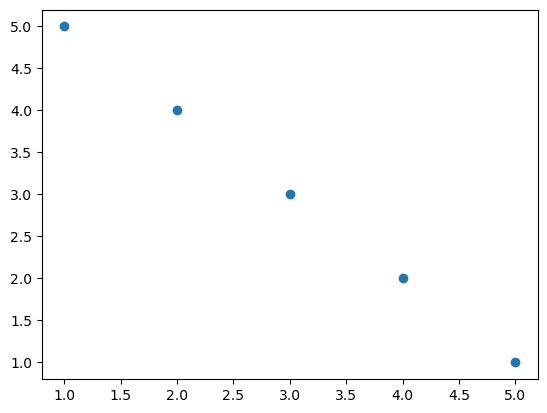

In [44]:
"""Чему равен коэффициент корреляции в данной выборке (попробуйте построить график для нахождения верного ответа):  """
x = np.array([4,5,2,3,1])
y = np.array([2,1,4,3,5])

plt.scatter(x, y)

print("Correlation:", cor(x, y))

## 3.2 Условия применения коэффициента корреляции<a id='3.2'></a>

### Основные определения и тезисы:
#### Ограничения для использования **r**:  
1) **Характер взаимосвязи** - должен быть **линейный и монотонный**(одна прямая линия на диаграмме рассеивания). В данных случаях с помощью коэффициента корреляции Фирмана интерпретировать данные нельзя:  
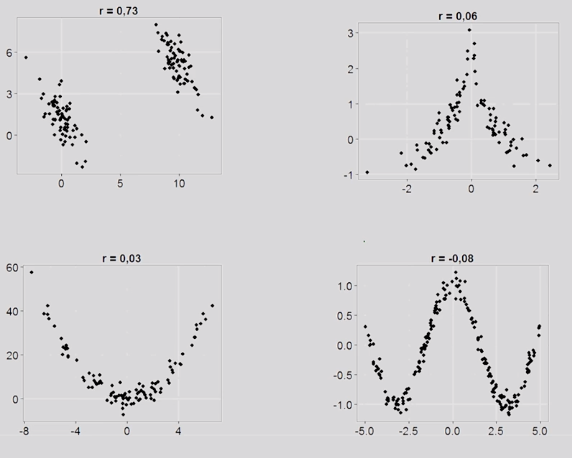  

2) **Распределение** - распределение данных должно стремиться к **нормальному**. Поскольку при рассчете корреляции используется среднее значение, выбросы, ассиметрия, бимодальность и т. д. могут сильно исказить значение **r**. На картинке слева - коэффициент корреляции без выбросов, справа - то же распределение, но с 2 выбросами:  
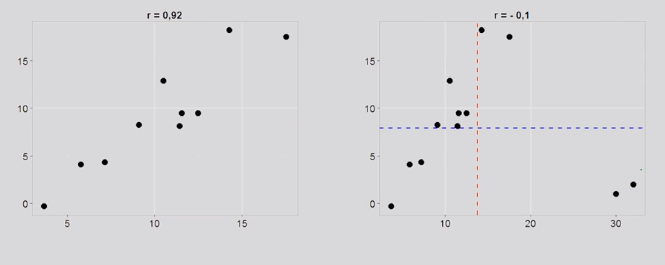  

#### Непараметрические аналоги r:
* **Коэфициент корреляции Спирмана** - Выбросы не так сильно искажают **r**, т.к. используются ранговые значения. Ранжируются значения x и y, затем вычисляются их **разности рангов(d^2)**.
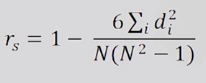  
*где d^2 - разность рангов возведённая в квадрат - (X - Y)^2*  
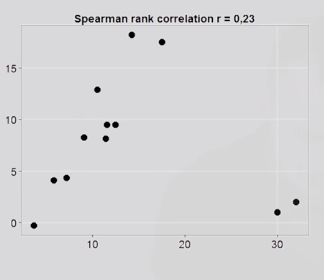  

* **Коэфициент корреляции тау(τ) Кендалла**  

**Корреляционная ошибка** - положительная или отрицательная взаимосвязь между переменными еще не говорит о причинно-следственной зависимости.  
**Влияние третьей переменной** - связь между двумя переменными может быть занижена или завышена из-за влияния третьей переменной, которая может влиять на обе переменные. Для учета влияния третьей переменной в корреляционном анализе обычно используют множественную регрессию.

### Примеры:  
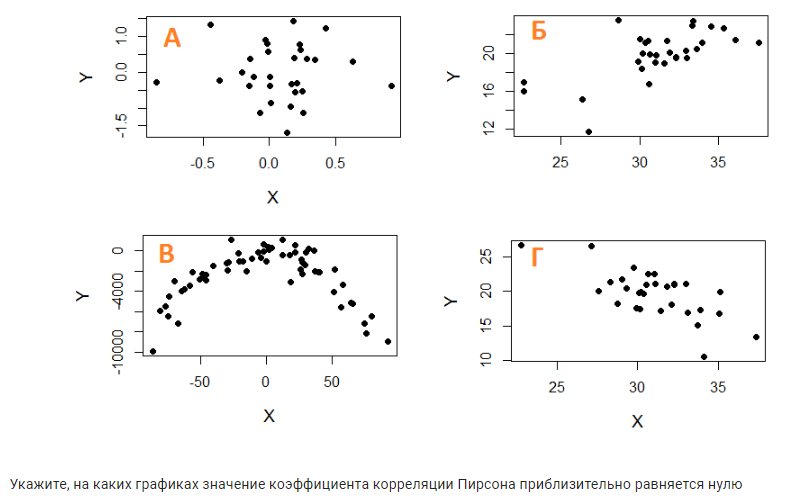  
Ответ: **A** и **B**.  

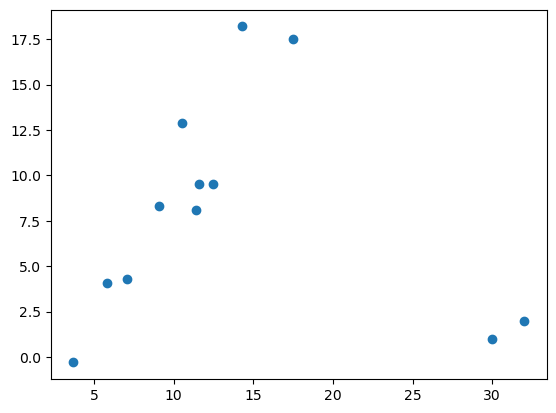

Коэффициент корреляции Спирмана: 0.2447552447552448
t-критерий: 0.7982633042766281
p_value: 0.4432619364501831
p_value > 0.05. Не отклоняем H0
corr_table scipy.spearmanr:  SignificanceResult(statistic=0.24168163157672948, pvalue=0.4491887440384277)


In [52]:
"""Пример расчет коэффициента корреляции Спирмана"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# пара наблюдений
X = np.array([3.7, 5.8, 7.1, 9.1, 10.5, 11.4, 11.6, 12.5, 14.3, 17.5, 30.0, 32.0])
Y = np.array([-0.3, 4.1, 4.3, 8.3, 12.9, 8.1, 9.5, 9.5, 18.2, 17.5, 1.0, 2.0])

# диаграмма рассеивания
plt.scatter(X, Y)
plt.show()

r_s = 1 - (6 * sum((stats.rankdata(X, method='ordinal')
           - stats.rankdata(Y, method='ordinal')) ** 2)) / (len(X) * (len(X) ** 2 - 1))
print('Коэффициент корреляции Спирмана:', r_s)

 

# H0: r_s = 0
# H1: r_s != 0

alpha = 0.05
# степень свободы
df = len(X) - 2
# t-критерий
t_value = (r_s * (df ** 0.5)) / ((1 - (r_s ** 2)) ** 0.5)
print('t-критерий:', t_value)
# p-уровень значимости
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value > {alpha}. Не отклоняем H0')
else:
    print(f'p_value < {alpha}. Отклоняем H0')

print('corr_table scipy.spearmanr: ', stats.spearmanr(X, Y))

## 3.3 Регрессия с одной независимой переменной<a id='3.3'></a>

### Основные определения и тезисы:
**Одномерный регрессионный анализ** - используется для изучения связи между двумя количественными переменными, когда одна переменная является зависимой(**y**), а другая - независимой(predict или **x**). Задача одномерной регрессии заключается в том, чтобы найти уравнение линейной зависимости между этими двумя переменными.  

**Линия регрессии** - представляет собой прямую линию, которая наилучшим образом описывает зависимость между двумя переменными в одномерной линейной регрессии. Эта прямая строится на основе коэффициентов β0 и β1:  

**y = b0 + b1x**  
где b0 - свободный член(intersept), отвечает за то, где прямая пересекает ось y;  
b1 - это коэффициент наклона(slope) - угловой коэффициент c осью x;  
x- это известное значение независимой переменной.  

**Метод наименьших квадратов(МНК)** - метод нахождения оптимальных параметров линейной регрессии(b0, b1), таких, чтобы сумма квадратов  ошибок(сумма квадратов остатков - **Σe^2**) была минимальна.  
Для каждой из точек рассчитывают расстояние(по оси y) до регрессионной прямой(синяя и краснаяя линия) - это расстояние и есть **остаток(e)**.  

**e1 = y1 - y1'**  
где y1 - фактическое значение зависимой переменной;  
y1' - прогнозные значения зависимой переменной(на прямой), которые рассчитываются на основе уравнения модели.  

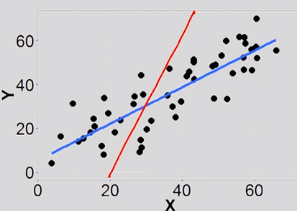  
Суть: найти такие параметры линейной регрессии, чтобы все точки находились максимально близко к ней.  

Коэффициенты рассчитываются следующим образом:  
**b1 = (sdy / sdx) * rxy** - sd - стандартное отклонение, r - коэфициент корреляции.  
**b0 = y_mean - b1 * x_mean**  

### Примеры:

b0 = 78.72979582661357, b1 = 1.2719624700175196


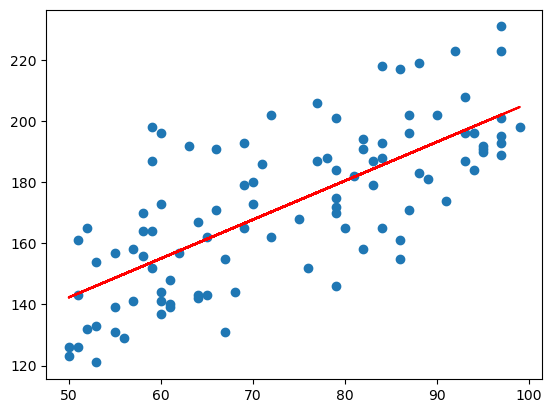

In [63]:
"""Пример регрессии с одной независимой переменной"""
import matplotlib.pyplot as plt
import numpy as np

N = 100

# случайные значения x и y
x = np.array([np.random.randint(50,100) for i in range(N)])
y = np.array([i+np.random.randint(80,120)-np.random.randint(-20,20) for i in x])

# рассчет коэффициентов
# b1 = y.std()/x.std()*cor(x, y)
# b0 = y.mean() - b1*x.mean()
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
print(f"b0 = {b0}, b1 = {b1}")

# функция линейной регрессии
f = lambda x: b0 + b1*x
y_pred = f(x)

# график
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

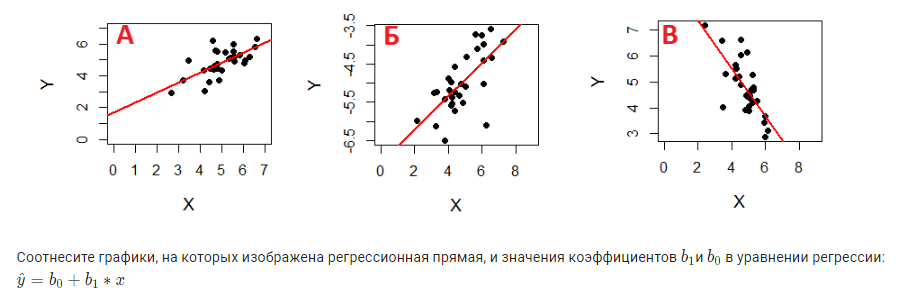  
*b1 - угол с осью x, b0 - где линия пересекает ось y.*  
A - (b1 > 0 ; b0 > 0);  
Б - (b1 > 0 ; b0 < 0);  
В - (b1 < 0 ; b0 > 0).
_______________________________________________________________________________________________________________________________

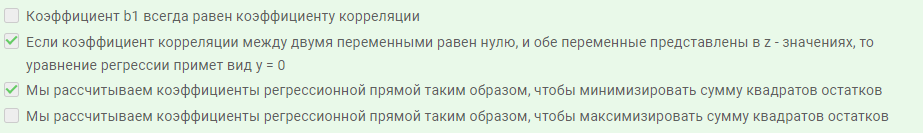
**Если коэффициент корреляции между двумя переменными равен нулю, и обе переменные представлены в z - значениях, то уравнение регрессии примет вид y = 0**  
Если и х и у привести в z, то :  
Mx = 0, Му = 0, D = 1, sdx = sqrt(Dx) = 1, sdy =s qrt(Dy) = 1;

Подставив значения получается:  
b1 = sdx / sdy * rxy = 1 / 1 * 0 = 0   
b0 = My - b1 * Mx = 0 - 0 * 0 = 0   
Функция выглядит: y = 0 + 0x = 0
______________________________________________________________________________________________________________________________

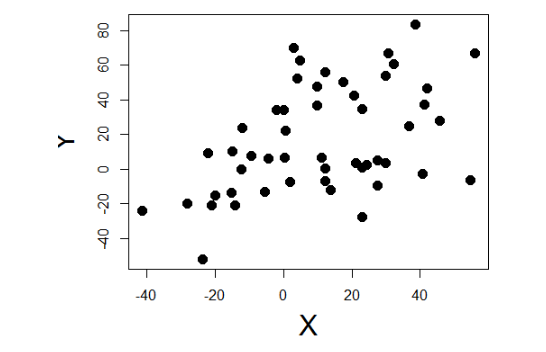

In [64]:
"""На графике изображена зависимость двух количественных переменных X и Y. 
   Рассчитайте коэффициент b1 для регрессионной прямой, если коэффициент детерминации равен 0,25:"""
# Дано: среднее дисперсия и коэффициент детерминации
mean_x = 15
D_x = 25
mean_y = 10
D_y = 36
R = 0.25

# стандартное отклонение
sd_x = D_x**0.5
sd_y = D_y**0.5

# коэффициент корреляции
r = R**0.5

b1 = sd_y / sd_x * r
b1

0.6

## 3.4 Гипотеза о значимости взаимосвязи и коэффициент детерминации<a id='3.4'></a>

### Основные определения и тезисы:
Нулевая гипотеза в одномерном регрессионном анализе заключается в том, что между зависимой переменной **y** и независимой переменной **x** не существует значимой линейной связи. Иными словами, H0 отрицает наличие любой связи между **x** и **y**, и предполагает, что изменения **x** не приводят к изменениям **y**.  
H0 может быть сформулирована следующим образом:  
**H0: b1 = 0** , тогда  
**H0: b1 ≠ 0**  

Если многократно повторять эксперимент когда верна H0, то b1 распределились относительно нормальным образом вокруг 0 с отклонением в обе стороны. Тогда: **t-критерий** = (b1 - 0) / se  = b1/se  
*0 - ожидаемое среднее ГС*  
**df** = N - 2  

Отклонив H0, о том что b1 = 0, мы можем сделать вывод, что обнаружена **значимая** взаимосвязь двух переменных.

**Коэффициент детерминации R^2** - доля зависимой переменной **y**, которая "объясняется" полученной регрессионной моделью. Чем больше R^2, тем лучше модель справляется с задачей.  
**R^2 = 1 - (SSres / SStotal)**  
где SSres сумма квадратов остатков(сумма расстояний от наблюдений до прямой в квадрате - синяя линия на рисунке),  
SStotal - сумма квадратов общая(сумма расстояний от наблюдений до среднего значения - красная линия на рисунке).  
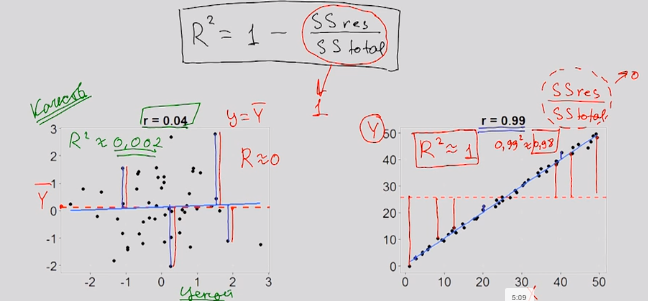  

Если коэффициент детерминации равен нулю, то и коэффициент b1 (slope) также равен нулю. Так как зависимость между Dxy() и b1 имеет вид:  
b1 = (sdx * R^2) / sdy

## 3.5 Условия применения линейной регрессии с одним предиктором<a id='3.5'></a>